<a href="https://colab.research.google.com/github/Luh-gif/Analise-de-vendas-/blob/main/Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

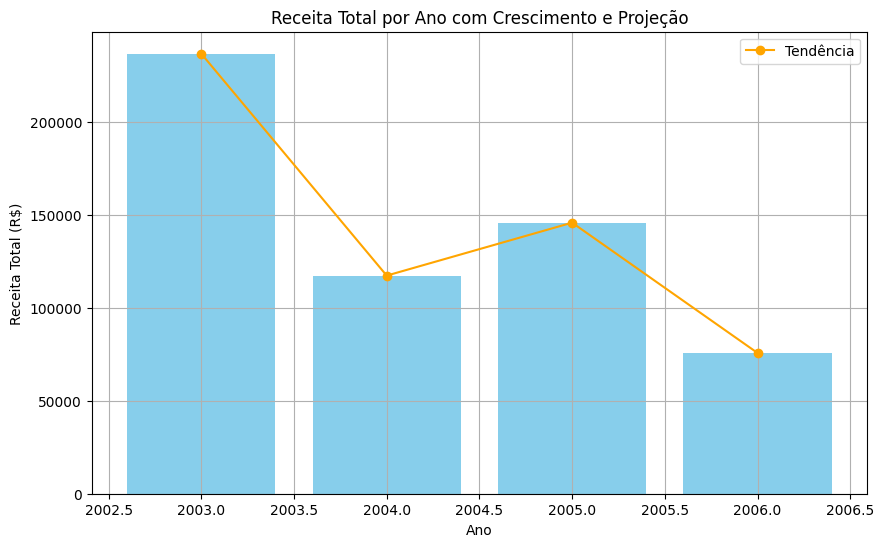

Receita total por ano, crescimento e projeção:
    ano  valor_venda  crescimento_percentual
0  2003     236863.6                     NaN
1  2004     117420.7              -50.426870
2  2005     145916.8               24.268379
3  2006      75786.9                     NaN


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar a base limpa
df = pd.read_csv('Dados limpos.csv')

# Garantir que data_pedido é datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'])

# Extrair ano da data
df['ano'] = df['data_pedido'].dt.year

# Receita total por ano
receita_por_ano = df.groupby('ano')['valor_venda'].sum().reset_index()

# Crescimento percentual anual
receita_por_ano['crescimento_percentual'] = receita_por_ano['valor_venda'].pct_change() * 100

# Projeção simples para o próximo ano (regressão linear)
X = receita_por_ano['ano'].values.reshape(-1, 1)
y = receita_por_ano['valor_venda'].values
model = LinearRegression()
model.fit(X, y)
proximo_ano = receita_por_ano['ano'].max() + 1
projetado = model.predict([[proximo_ano]])[0]

# Adicionar projeção ao dataframe
proj_df = pd.DataFrame({'ano': [proximo_ano], 'valor_venda': [projetado], 'crescimento_percentual': [np.nan]})
receita_por_ano = pd.concat([receita_por_ano, proj_df], ignore_index=True)

# Visualização
plt.figure(figsize=(10, 6))
plt.bar(receita_por_ano['ano'], receita_por_ano['valor_venda'], color='skyblue')
plt.plot(receita_por_ano['ano'], receita_por_ano['valor_venda'], marker='o', color='orange', label='Tendência')
plt.title('Receita Total por Ano com Crescimento e Projeção')
plt.xlabel('Ano')
plt.ylabel('Receita Total (R$)')
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print("Receita total por ano, crescimento e projeção:")
print(receita_por_ano)

/tmp/ipython-input-3893191760.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentual_contribuicao', y='linha_produto', data=top_5, palette='viridis')


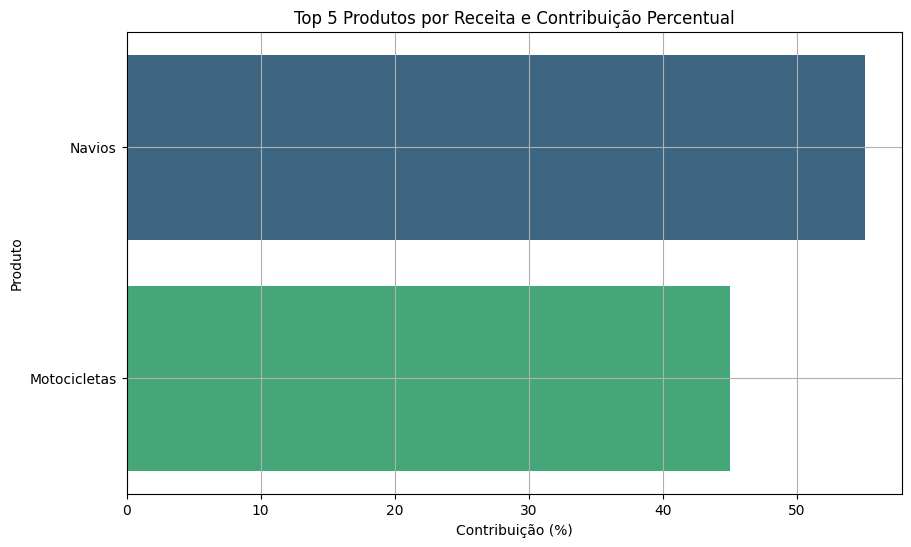

Top 5 produtos por receita e contribuição:
  linha_produto  valor_venda  percentual_contribuicao
1        Navios     263337.5                55.032155
0  Motocicletas     215178.2                44.967845


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base limpa
df = pd.read_csv('Dados limpos.csv')

# Receita total por produto (usando linha_produto como proxy para produto)
receita_por_produto = df.groupby('linha_produto')['valor_venda'].sum().reset_index()
receita_total = receita_por_produto['valor_venda'].sum()

# Contribuição percentual
receita_por_produto['percentual_contribuicao'] = (receita_por_produto['valor_venda'] / receita_total) * 100

# Top 5
top_5 = receita_por_produto.sort_values('valor_venda', ascending=False).head(5)

# Visualização
plt.figure(figsize=(10, 6))
sns.barplot(x='percentual_contribuicao', y='linha_produto', data=top_5, palette='viridis')
plt.title('Top 5 Produtos por Receita e Contribuição Percentual')
plt.xlabel('Contribuição (%)')
plt.ylabel('Produto')
plt.grid(True)
plt.show()

# Resultados
print("Top 5 produtos por receita e contribuição:")
print(top_5)

/tmp/ipython-input-2897426878.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_venda', y='pais', data=vendas_por_pais, palette='coolwarm')


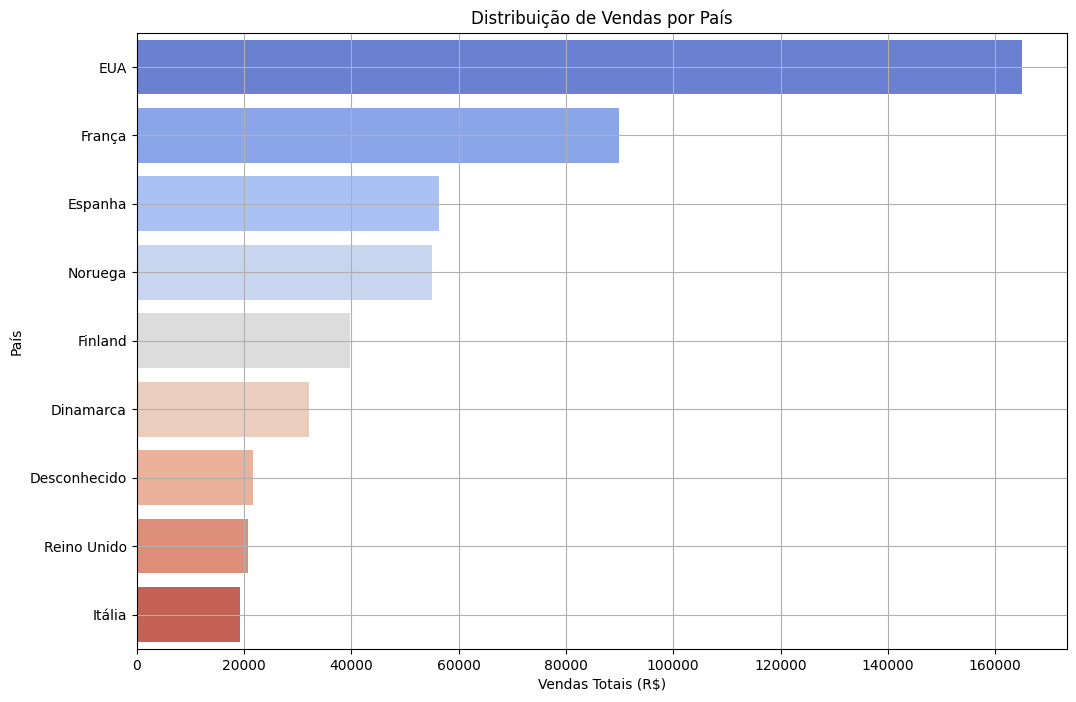

Distribuição de vendas por país:
           pais  valor_venda
0           EUA     165069.6
1        França      89976.2
2       Espanha      56420.1
3       Noruega      55123.2
4       Finland      39785.1
5     Dinamarca      32093.8
6  Desconhecido      21685.4
7   Reino Unido      20828.5
8        Itália      19219.2

País com maior variação mensal: Espanha
Variação por país (desvio padrão):
           pais   valor_venda
0       Espanha  36720.974386
1           EUA  34384.528084
2        França  15604.307312
3  Desconhecido           NaN
4     Dinamarca           NaN
5       Finland           NaN
6        Itália           NaN
7       Noruega           NaN
8   Reino Unido           NaN


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base limpa
df = pd.read_csv('Dados limpos.csv')

# Garantir datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'])
df['mes_ano'] = df['data_pedido'].dt.to_period('M')

# Distribuição de vendas por país
vendas_por_pais = df.groupby('pais')['valor_venda'].sum().sort_values(ascending=False).reset_index()

# Variação mensal por país (desvio padrão das vendas mensais)
vendas_mensais_por_pais = df.groupby(['pais', 'mes_ano'])['valor_venda'].sum().reset_index()
var_por_pais = vendas_mensais_por_pais.groupby('pais')['valor_venda'].std().sort_values(ascending=False).reset_index()
pais_maior_var = var_por_pais.iloc[0]['pais']

# Visualização distribuição
plt.figure(figsize=(12, 8))
sns.barplot(x='valor_venda', y='pais', data=vendas_por_pais, palette='coolwarm')
plt.title('Distribuição de Vendas por País')
plt.xlabel('Vendas Totais (R$)')
plt.ylabel('País')
plt.grid(True)
plt.show()

# Resultados
print("Distribuição de vendas por país:")
print(vendas_por_pais)
print(f"\nPaís com maior variação mensal: {pais_maior_var}")
print("Variação por país (desvio padrão):")
print(var_por_pais)

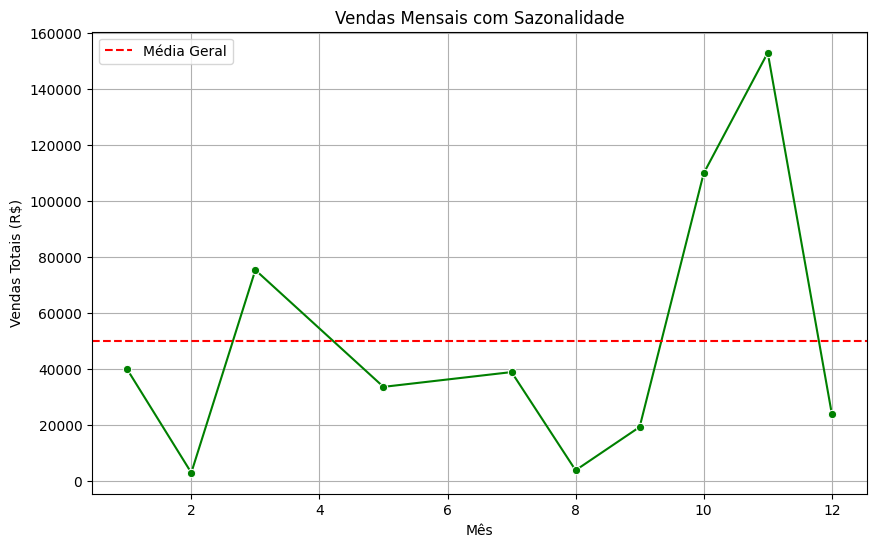

Vendas por mês e desvio da média:
   mes  valor_venda  desvio_da_media
0    1      39785.1       -20.461790
1    2       2871.0       -94.260309
2    3      75337.3        50.614023
3    5      33560.3       -32.906385
4    7      38843.4       -22.344433
5    8       3746.7       -92.509613
6    9      19219.2       -61.577054
7   10     109906.4       119.724427
8   11     153001.9       205.880775
9   12      23929.8       -52.159641

Mês com maior pico: 11.0 (desvio de 205.88%)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base limpa
df = pd.read_csv('Dados limpos.csv')

# Garantir datetime e extrair mês
df['data_pedido'] = pd.to_datetime(df['data_pedido'])
df['mes'] = df['data_pedido'].dt.month

# Vendas totais por mês
vendas_por_mes = df.groupby('mes')['valor_venda'].sum().reset_index()

# Média geral
media_vendas = vendas_por_mes['valor_venda'].mean()

# Desvio do pico em relação à média
vendas_por_mes['desvio_da_media'] = (vendas_por_mes['valor_venda'] - media_vendas) / media_vendas * 100
mes_pico = vendas_por_mes.loc[vendas_por_mes['desvio_da_media'].idxmax()]

# Visualização
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='valor_venda', data=vendas_por_mes, marker='o', color='green')
plt.axhline(media_vendas, color='red', linestyle='--', label='Média Geral')
plt.title('Vendas Mensais com Sazonalidade')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais (R$)')
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print("Vendas por mês e desvio da média:")
print(vendas_por_mes)
print(f"\nMês com maior pico: {mes_pico['mes']} (desvio de {mes_pico['desvio_da_media']:.2f}%)")

Correlação geral: -0.04 (p-value: 0.8692)


/tmp/ipython-input-787892978.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_por_porte = df.groupby('porte_negocio').apply(calculate_pearsonr_for_group).reset_index()


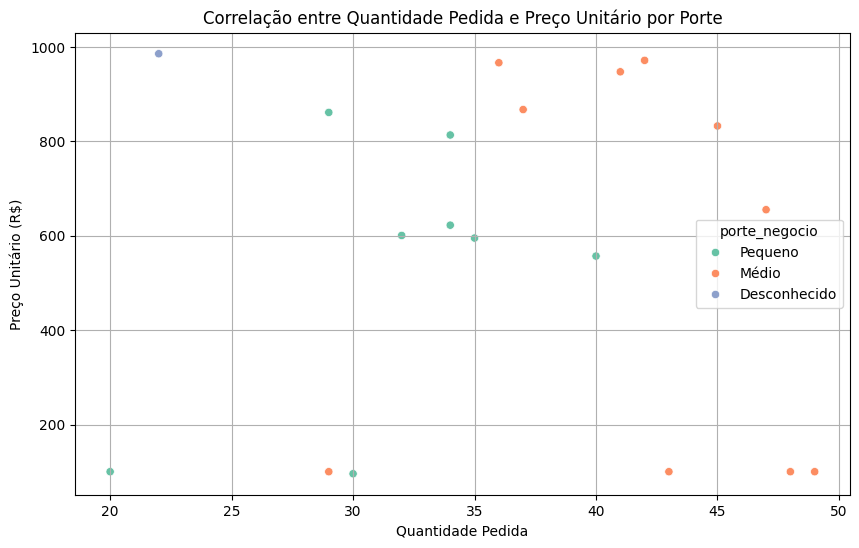


Correlação por porte de negócio:
  porte_negocio  correlacao
0  Desconhecido         NaN
1         Médio   -0.153060
2       Pequeno    0.527153


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Carregar a base limpa
df = pd.read_csv('Dados limpos.csv')

# Correlação geral (Pearson)
# Garantir que há pelo menos 2 pontos para a correlação geral
if len(df['quantidade_pedida']) >= 2 and len(df['preco_unitario']) >= 2:
    corr, p_value = pearsonr(df['quantidade_pedida'], df['preco_unitario'])
    print(f"Correlação geral: {corr:.2f} (p-value: {p_value:.4f})")
else:
    print("Não há dados suficientes para calcular a correlação geral.")
    corr, p_value = np.nan, np.nan

# Correlação por porte de negócio
def calculate_pearsonr_for_group(group):
    if len(group) >= 2:
        # Filtrar valores NaN antes de calcular pearsonr
        valid_data = group[['quantidade_pedida', 'preco_unitario']].dropna()
        if len(valid_data) >= 2:
            return pearsonr(valid_data['quantidade_pedida'], valid_data['preco_unitario'])[0]
    return np.nan

corr_por_porte = df.groupby('porte_negocio').apply(calculate_pearsonr_for_group).reset_index()
corr_por_porte.columns = ['porte_negocio', 'correlacao']

# Visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantidade_pedida', y='preco_unitario', hue='porte_negocio', data=df, palette='Set2')
plt.title('Correlação entre Quantidade Pedida e Preço Unitário por Porte')
plt.xlabel('Quantidade Pedida')
plt.ylabel('Preço Unitário (R$)')
plt.grid(True)
plt.show()

# Resultados
print("\nCorrelação por porte de negócio:")
print(corr_por_porte)

Tamanho treino: 15 | Teste: 4
Erro Médio Quadrático (MSE): 642528305.42 (quanto menor, melhor)
R² Score: -2.31 (quanto mais perto de 1, melhor)

Previsões vs Reais:
       Real      Previsto
0    2871.0  35503.184987
5   34797.6  27405.818632
11   2227.6  34019.783346
1    2765.9  23739.034504


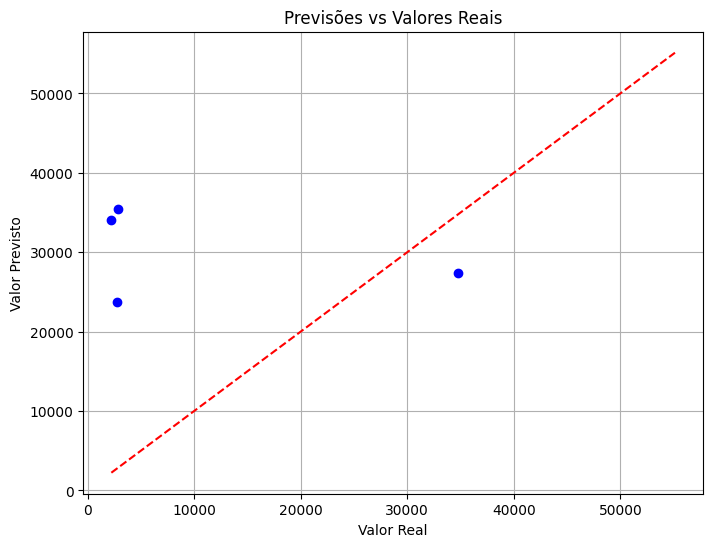

In [25]:
# Célula 1: Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Célula 2: Carregar os dados (substitua pela sua base real no upload)
df = pd.read_csv('Dados limpos.csv')

# Para a amostra: (Comentado para usar o arquivo 'Dados limpos.csv')
# from io import StringIO
# data_amostra = """
# quantidade_pedida,preco_unitario,numero_linha_pedido,valor_venda
# 10,50,1,500
# 20,45,2,900
# 30,40,3,1200
# 40,35,4,1400
# 50,30,5,1500
# """
# df = pd.read_csv(StringIO(data_amostra))

# Célula 3: Preparar dados para ML
# Features (X) e target (y) - prever valor_venda
X = df[['quantidade_pedida', 'preco_unitario', 'numero_linha_pedido']]
y = df['valor_venda']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho treino: {len(X_train)} | Teste: {len(X_test)}")

# Célula 4: Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no teste
y_pred = model.predict(X_test)

# Célula 5: Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Médio Quadrático (MSE): {mse:.2f} (quanto menor, melhor)")
print(f"R² Score: {r2:.2f} (quanto mais perto de 1, melhor)")

# Exibir previsões vs reais
results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nPrevisões vs Reais:")
print(results)

# Célula 6: Visualizar resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.grid(True)
plt.show()